### A von Neumann growth model
##### and a generalization


This notebook uses the class  `neumann` to calculate key objects of a linear growth model of John von Neumann (1937) that was generalized by Kemeny, Moregenstern and Thompson (1956). Objects of interest are the maximal expansion rate (`alpha`), the interest factor (`beta`), and the optimal intensities (`x`) and prices (`p`). 


In addition to watching how the towering mind of John von Neumann formulated an equilibrium model of   price and quantity vectors in balanced growth, this notebook  shows how fruitfully to  employ the following important tools:

  * a zero-sum two player game
  
  * linear programming
  
  * the Perron-Frobenius theorem





In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision = 2)

The next few lines of code fetch the file `neumann.py` that does most of the calculations.

In [ ]:
from quantecon import fetch_nb_dependencies
fetch_nb_dependencies(["neumann.py"])
from neumann import neumann

-------
**Notation:** We use the following notation. $\mathbf{0}$ denotes a vector of zeros. We call an $n$-vector 
- positive or $x\gg \mathbf{0}$ if $x_i>0$ for all $i=1,2,\dots,n$ 
- nonnegative or $x\geq \mathbf{0}$ if $x_i\geq 0$ for all $i=1,2,\dots,n$
- semipositive or $x > \mathbf{0}$ if $x\geq \mathbf{0}$ and $x\neq \mathbf{0}$  

For two comformable vectors $x$ and $y$, $x\gg y$,  $x\geq y$ and $x> y$ mean $x-y\gg \mathbf{0}$,  $x-y \geq \mathbf{0}$, and $x-y > \mathbf{0}$. 

By default, all vectors are column vectors, $x^{T}$ denotes the transpose of $x$ (i.e. a row vector). Let $\iota_n$ denote a column vector composed of $n$ ones, i.e. $\iota_n = (1,1,\dots,1)^T$. Let $e^i$ denote the vector (of arbitrary size) containing zeros except for the $i$th position where it is one.  

We denote matrices by capital letters. For an arbitrary matrix $A$, $a_{i,j}$ represents the entry in its $i$th row and $j$th column.  $a_{\cdot j}$ and $a_{i\cdot}$ denote the $j$th column and $i$th row of  $A$, respectively.

------

## Model ingredients and assumptions:


A pair $(A,B)$ of $m\times n$ nonnegative matrices defines an economy.

  *  $m$ is the number of *activities* (or sectors)
  
  *  $n$ is the number of *goods* (produced and/or used in the economy)
  
  *  $A$ is called the *input matrix*;  $a_{i,j}$ denotes the amount of good $j$ consumed by activity $i$. 
  
  * $B$ is called the *output matrix*; $b_{i,j}$ represents the amount of good $j$ produced by activity $i$. 

Two key assumptions restrict economy $(A,B)$: 
- **Assumption I:** (every good which is consumed is also produced)
    $$ b_{.,j} > \mathbf{0}\hspace{5mm}\forall j=1,2,\dots,n$$ 
- **Assumption II:** (no free lunch)
    $$ a_{i,.} > \mathbf{0}\hspace{5mm}\forall i=1,2,\dots,m$$

A semipositive $m$-vector $x$ denotes the levels at which activities are operated (_intensity vector_). 

Therefore, 

   *  vector $x^TA$ gives the total amount of *goods used in production*
   
   *  vector $x^TB$ gives *total outputs*
   
An  economy $(A,B)$ is said to be _productive_, if there exists a nonnegative intensity vector $x \geq 0$ such that $x^T B > x^TA$. 

The semipositive $n$-vector $p$ contains prices assigned to the $n$ goods. 

The $p$ vector implies *cost* and *revenue* vectors

   * the vector $Ap$ tells *costs* of the vector of activities
   
   * the vector  $Bp$ tells *revenues* from the vector of activities
-------------------------

A property of an input-output pair $(A,B)$ called *irreducibility* (or indecomposability) determines whether an economy can be decomposed into multiple ''sub-economies'': 

**Definition:** Given an economy $(A,B)$, the set of goods $S\subset \{1,2,\dots,n\}$ is called an _independent subset_ if it is possible to produce every good in $S$ without consuming any good outside $S$. Formally, the set $S$ is independent if $\exists T\subset \{1,2,\dots,m\}$ (subset of activities) such that $a_{i,j}=0$, $\forall i\in T$ and $j\in S^c$ and for all $j\in S$, $\exists i\in T$, s.t. $b_{i,j}>0$. The economy is **irreducible** if there are no proper independent subsets.


We study two examples, both coming from Chapter 9.6 of Gale (1960).

In [2]:
# (1) Irreducible (A, B) example: alpha_0 = beta_0
A1 = np.array([[0, 1, 0, 0], 
               [1, 0, 0, 1], 
               [0, 0, 1, 0]])

B1 = np.array([[1, 0, 0, 0], 
               [0, 0, 2, 0], 
               [0, 1, 0, 1]])

# (2) Reducible (A, B) example: beta_0 < alpha_0 
A2 = np.array([[0, 1, 0, 0, 0, 0], 
               [1, 0, 1, 0, 0, 0], 
               [0, 0, 0, 1, 0, 0], 
               [0, 0, 1, 0, 0, 1], 
               [0, 0, 0, 0, 1, 0]])

B2 = np.array([[1, 0, 0, 1, 0, 0], 
               [0, 1, 0, 0, 0, 0], 
               [0, 0, 1, 0, 0, 0], 
               [0, 0, 0, 0, 2, 0], 
               [0, 0, 0, 1, 0, 1]])

 The following code sets up our first Neumann economy or  `neumann` instance  

In [3]:
N1 = neumann(A1, B1)
N1


Generalized von Neumann expanding model:
  - number of goods          : 4
  - number of activities     : 3

Assumptions:
  - AI:  every column of B has a positive entry    : True
  - AII: every row of A has a positive entry       : True


In [4]:
N2 = neumann(A2, B2)
N2


Generalized von Neumann expanding model:
  - number of goods          : 6
  - number of activities     : 5

Assumptions:
  - AI:  every column of B has a positive entry    : True
  - AII: every row of A has a positive entry       : True


## Dynamic interpretation 

Attach a time index $t$ to the preceding objects, regard aneconomy as a dynamic system, and study  sequences 

$$\{(A_t,B_t)\}_{t\geq 0}, \hspace{1cm}\{x_t\}_{t\geq 0},\hspace{1cm} \{p_t\}_{t\geq 0}$$

An interesting special case holds the technology process constant and investigates the dynamics of quantities and prices only. 

Accordingly, in the rest of this notebook we assume that $(A_t,B_t)=(A,B)$ for all $t\geq 0$. 

-------
A crucial element of the dynamic iterpretation involves the timing of production.

We assume that production (consumption of inputs) takes place in period $t$, while the associated output materializes in period $t+1$, i.e. consumption of $x_{t}^TA$ in period $t$ results in $x^T_{t}B$ amounts of output in period $t+1$. 

These timing conventions imply the following feasibiliy condition:

\begin{align}
x^T_{t}B \geq x^T_{t+1} A \hspace{1cm}\forall t\geq 1,
\end{align}

which asserts that no more goods can be used today than were produced yesterday. 

Accordingly,  $Ap_t$ tells the costs of production in period $t$ and $Bp_t$ tells revenues in period $t+1$. 

## Balanced growth

We follow John von Neumann in studying "balanced growth"

Let `./` denote elementwise division of one vector by another and let $\alpha >0$ be a scalar.  

Then *balanced growth* is a situation in which 

$$ x_{t+1}./x_t = \alpha , \quad \forall t \geq 0$$

With balanced growth, the law of motion of $x$ is evidently $ x_{t+1}=\alpha x_t $ and so we can rewrite the feasibility constraint as

$$x^T_{t}B \geq \alpha x^T_t A \hspace{1cm}\forall t$$

In the same spirit, define $\beta\in\mathbb{R}$ as the **interest factor** per unit of time.

We assume that it is always possible to earn a gross return equal to the constant interest factor $\beta$ by  investing "outside the model". 

Under this assumption about outside investment opportunities, a no-arbitrage condition gives rise to the following (no profit) restriction on the price sequence:

$$\beta Ap_{t} \geq B p_{t} \hspace{1cm}\forall t$$

This says that production cannot yield a return greater than that offered by the investment opportunity (note that we compare values in period $t+1$). 

The balanced growth assumption allows us to drop time subscripts and conduct an analysis purely in terms of a time-invariant growth rate $\alpha$ and interest factor $\beta$


## Duality

The following two problems are connected by a remarkable dual relationship between the technological and valuation characteristics of the economy:

**Definition:** The *technological expansion problem* (TEP) for economy $(A,B)$ is to find a semipositive $m$-vector $x>0$ and a number $\alpha\in\mathbb{R}$, s.t.

\begin{align*}
    &\max_{\alpha} \hspace{2mm} \alpha\\
    &\text{s.t. }\hspace{2mm}x^T B \geq \alpha x^T A
\end{align*}

Theorem 9.3 of David Gale's book assets that if Assumptions I and II are both satisfied, then a maximum value of $\alpha$ exists and it is positive. It is called the _technological expansion rate_ and is denoted by $\alpha_0$. The associated intensity vector $x_0$ is the _optimal intensity vector_.

--------------

**Definition:** The *economical expansion problem* (EEP) for $(A,B)$ is to find a semipositive $n$-vector $p>0$ and a number $\beta\in\mathbb{R}$, such that

\begin{align*}
    &\min_{\beta} \hspace{2mm} \beta\\
    &\text{s.t. }\hspace{2mm}Bp \leq \beta Ap
\end{align*}

Assumptions I and II imply existence of a minimum value $\beta_0>0$ called the _economic expansion rate_. The corresponding price vector $p_0$ is the _optimal price vector_.

---------------

Evidently, the criterion functions in  *technological expansion* problem and the *economical expansion problem*  are both linearly homogeneous, so the optimality of $x_0$ and $p_0$ are defined only up to a positive scale factor. 

For simplicity (and to emphasize a close connection to zero-sum games), in the following, we normalize both vectors  $x_0$ and $p_0$ to have unit length. 

A standard duality argument (see Lemma 9.4. in (Gale, 1960)) implies that under Assumptions I and II, $\beta_0\leq \alpha_0$

But in the other direction, that is $\beta_0\geq \alpha_0$, Assumptions I and II are not sufficient. 

Nevertheless, von Neumann (1937) proved the following remarkable "duality-type" result connecting TEP and EEP.

**Theorem 1 (von Neumann):** If the economy $(A,B)$ satisfies Assumptions I and II, then there exists a set $\left(\gamma^{*}, x_0, p_0\right)$, where $\gamma^{*}\in[\beta_0, \alpha_0]\subset\mathbb{R}$, $x_0>0$ is an $m$-vector, $p_0>0$ is an $n$-vector and the following holds true

\begin{align*}
x_0^T B &\geq \gamma^{*} x_0^T A \\
Bp_0 &\leq \gamma^{*} Ap_0 \\
x_0^T\left(B-\gamma^{*} A\right)p_0 &= 0
\end{align*}

> *Proof (Sketch):* Assumption I and II imply that there exist $(\alpha_0, x_0)$ and $(\beta_0, p_0)$ solving the TEP and EEP, repspectively. If $\gamma^*>\alpha_0$, then by defintion of $\alpha_0$, there cannot exist a semipositive $x$ that satisfies $x^T B \geq \gamma^{*} x^T A$. Similarly, if $\gamma^*<\beta_0$, there is no semipositive $p$ so that $Bp \leq \gamma^{*} Ap$. Let $\gamma^{*}\in[\beta_0, \alpha_0]$, then $x_0^T B \geq \alpha_0 x_0^T A \geq \gamma^{*} x_0^T A$. Moreover, $Bp_0\leq \beta_0 A p_0\leq \gamma^* A p_0$. This two inequalities imply $x_0\left(B - \gamma^{*} A\right)p_0 = 0$.

Here the constant $\gamma^{*}$ is both expansion and interest factor (not neccessarily optimal). We have already encountered and discussed the first two inequalities that represent feasibility and no-profit conditions. Moreover, the equality compactly captures the requirements that if any good grows at a rate larger than $\gamma^{*}$ (i.e., if it is ''oversupplied''), then its price must be zero;  and that if any activity provides negative profit, it must be unused. Therefore, these expressions encode all equilbrium conditions and Theorem I essentially states that under Assumptions I and II there always exists an equilibrium $\left(\gamma^{*}, x_0, p_0\right)$ with balanced growth.

Note that Theorem I is silent about uniqueness of the equilibrium. In fact, it does not rule out (trivial) cases with $x_0^TBp_0 = 0$ so that nothing of value is produced. To exclude  such uninteresting cases, Kemeny, Morgenstern and Thomspson (1956) add an extra requirement 

$$x^T_0 B p_0 > 0$$

and call the resulting equilibria *economic solutions*. They show that this extra condition does not affect the existence result, while it significantly reduces the number of (relevant) solutions.  

----------------------------

## Interpretation as a game theoretic problem (two-player zero-sum game)


To compute the equilibrium $(\gamma^{*}, x_0, p_0)$, we follow the algorithm proposed by Hamburger, Thompson and Weil (1967), building on the key insight that the equilibrium (with balanced growth) can be considered as a solution of a particular two-player zero-sum game. First, we introduce some notations.

Consider the $m\times n$ matrix $C$ as a payoff matrix, with the entries representing payoffs from the **minimizing** column player to the **maximizing** row player and assume that the players can use mixed strategies: 
- row player chooses the $m$-vector $x > \mathbf{0}$, s.t. $\iota_m^T x = 1$
- column player chooses the $n$-vector $p > \mathbf{0}$, s.t. $\iota_n^T p = 1$

**Definition:** The $m\times n$ matrix game $C$ has the *solution* $(x^*, p^*, V(C))$ in mixed strategies, if 

\begin{align}
(x^*)^T C e^j \geq V(C)\quad \forall j\in\{1, \dots, n\}\quad \quad \text{and}\quad\quad (e^i)^T C p^* \leq V(C)\quad \forall i\in\{1, \dots, m\}
\end{align}

The number $V(C)$ is called the *value* of the game. 

From the above definition, it is clear that the value $V(C)$ has two alternative interpretations: 
* by playing the appropriate mixed stategy, the maximizing player can assure himself at least $V(C)$ (no matter what the column player chooses)
* by playing the appropriate mixed stategy, the minimizing player can make sure that the maximizing player will not get more than $V(C)$ (irrespective of what is the maximizing player's choice)

From the famous theorem of Nash (1951), it follows that there always exists a mixed strategy Nash equilibrium for any *finite* two-player zero-sum game. Moreover, von Neumann's Minmax Theorem (1928) implies that 

$$V(C) = \max_x \min_p \hspace{2mm} x^T C p = \min_p \max_x \hspace{2mm} x^T C p = (x^*)^T C p^*$$

### Connection with Linear Programming (LP) 

Finding Nash equilibria of a finite two-player zero-sum game can be formulated as a linear programming problem. To see this, we introduce the following notation
- For a fixed $x$, let $v$ be the value of the minimization problem:  $v \equiv \min_p x^T C p = \min_j x^T C e^j$ 
- For a fixed $p$, let $u$ be the value of the maximization problem:  $u \equiv \max_x x^T C p = \max_i (e^i)^T C p$ 

Then the *max-min problem* (the game from the maximizing player's point of view) can be written as the *primal* LP

\begin{align}
V(C) = & \max \hspace{2mm} v \\
\text{s.t. } \hspace{2mm} v \iota_n^T &\leq x^T C  \\
x &\geq \mathbf{0} \\
\iota_n^T x & = 1
\end{align}

while the *min-max problem* (the game from the minimizing player's point of view) is the *dual* LP

\begin{align}
V(C) = &\min \hspace{2mm} u \\
\text{s.t. } \hspace{2mm}u \iota_m &\geq Cp  \\
p &\geq \mathbf{0} \\
\iota_m^T p & = 1
\end{align}


---------------------------------------------------------

Hamburger, Thompson and Weil (1967) view the input-output pair of the economy as payoff matrices of two-player zero-sum games. Using this interpretation, they restate Assumption I and II as follows 

$$V(-A) < 0\quad\quad \text{and}\quad\quad V(B)>0$$

> *Proof (Sketch)*: 
* $\Rightarrow$ $V(B)>0$ implies $x_0^T B \gg \mathbf{0}$, where $x_0$ is a maximizing vector. Since $B$ is non-negative, this requires that each column of $B$ has at least one positive entry, which is Assumption I. 
* $\Leftarrow$ From Assumption I and the fact that $p>\mathbf{0}$, it follows that $Bp > \mathbf{0}$. This implies that the maximizing player can always choose $x$ so that $x^TBp>0$, that is it must be the case that $V(B)>0$.

In order to (re)state Theorem I in terms of a particular two-player zero-sum game, we define the matrix for $\gamma\in\mathbb{R}$

$$M(\gamma) \equiv B - \gamma A$$

For fixed $\gamma$, treating $M(\gamma)$ as a matrix game, we can calculate the solution of the game.

* If $\gamma > \alpha_0$, then for all $x>0$, there $\exists j\in\{1, \dots, n\}$, s.t. $[x^T M(\gamma)]_j < 0$ implying that $V(M(\gamma)) < 0$
* If $\gamma < \beta_0$, then for all $p>0$, there $\exists i\in\{1, \dots, m\}$, s.t. $[M(\gamma)p]_i > 0$ implying that $V(M(\gamma)) > 0$
* If $\gamma \in \{\beta_0, \alpha_0\}$, then (by Theorem I) the optimal intensity and price vectors $x_0$ and $p_0$ satisfy

\begin{align}
x_0^T M(\gamma) \geq \mathbf{0}^T \quad \quad \text{and}\quad\quad M(\gamma) p_0 \leq \mathbf{0} 
\end{align}

That is, $(x_0, p_0, 0)$ is a solution of the game $M(\gamma)$ so that $V\left(M(\beta_0)\right) = V\left(M(\alpha_0)\right) = 0$.
* If $\beta_0 < \alpha_0$ and $\gamma \in (\beta_0, \alpha_0)$, then $V(M(\gamma)) = 0$. Moreover, if $x'$ is optimal for the maximizing player in $M(\gamma')$ for $\gamma'\in(\beta_0, \alpha_0)$ and $p''$ is optimal for the minimizing player in $M(\gamma'')$ where $\gamma''\in(\beta_0, \gamma')$, then $(x', p'', 0)$ is a solution for $M(\gamma)$, $\forall \gamma\in (\gamma'', \gamma')$. 
> *Proof (Sketch):* If $x'$ is optimal for a maximizing player in game $M(\gamma')$, then $(x')^T M(\gamma')\geq \mathbf{0}^T$ and so for all $\gamma<\gamma'$
$$(x')^T M(\gamma) = (x')^T M(\gamma') + (x')^T(\gamma' - \gamma)A \geq \mathbf{0}^T $$
hence $V(M(\gamma))\geq 0$. If $p''$ is optimal for a minimizing player in game $M(\gamma'')$, then $ M(\gamma'')p''\leq \mathbf{0}$ and so for all $\gamma''<\gamma$
$$ M(\gamma)p'' = M(\gamma'') + (\gamma'' - \gamma)Ap'' \leq \mathbf{0}$$
hence $V(M(\gamma))\leq 0$. 

It is clear from the above argument that $\beta_0$, $\alpha_0$ are the minimal and maximal $\gamma$ for which $V(M(\gamma))=0$. Moreover, Hamburger et al. (1967) show that the function $\gamma \mapsto V(M(\gamma))$ is continuous and nonincreasing in $\gamma$. This suggests an algorithm to compute $(\alpha_0, x_0)$ and $(\beta_0, p_0)$ for a given input-output pair $(A, B)$. 

## Algorithm

Hamburger, Thompson and Weil (1967) propose a simple bisection algorithm to find the minimal and maximal roots (i.e. $\beta_0$ and $\alpha_0$) of the function $\gamma \mapsto V(M(\gamma))$.

### Step 1

First, notice that we can easily find trivial upper and lower bounds for $\alpha_0$ and $\beta_0$. 
 * TEP requires that $x^T(B-\alpha A)\geq \mathbf{0}^T$ and $x > \mathbf{0}$, so if $\alpha$ is so large that $\max_i\{[(B-\alpha A)\iota_n]_i\} < 0$, then TEP ceases to have a solution. Accordingly, let **`UB`** be the $\alpha^{*}$ that solves $\max_i\{[(B-\alpha^{*} A)\iota_n]_i\} = 0$. 
 * Similar to the upper bound, if $\beta$ is so low that $\min_j\{[\iota^T_m(B-\beta A)]_j\}>0$, then the EEP has no solution and so we can define **`LB`** as the $\beta^{*}$ that solves $\min_j\{[\iota^T_m(B-\beta^{*} A)]_j\}=0$.

The `bounds` method calculates these trivial bounds for us 

In [5]:
N1.bounds()

(1.0, 2.0)

### Step 2

Compute $\alpha_0$ and $\beta_0$

* Finding $\alpha_0$
    1. Fix $\gamma = \frac{UB + LB}{2}$ and compute the solution of the two-player zero-sum game associated with $M(\gamma)$. We can use either the primal or the dual LP problem. 
    2. If $V(M(\gamma)) \geq 0$, then set $LB = \gamma$, otherwise let $UB = \gamma$
    3. Iterate on 1. and 2. until $|UB - LB| < \epsilon$

* Finding $\beta_0$
    1. Fix $\gamma = \frac{UB + LB}{2}$ and compute the solution of the two-player zero-sum game associated with $M(\gamma)$. We can use either the primal or the dual LP problem. 
    2. If $V(M(\gamma)) > 0$, then set $LB = \gamma$, otherwise let $UB = \gamma$
    3. Iterate on 1. and 2. until $|UB - LB| < \epsilon$


>*Existence*: Since $V(M(LB))>0$ and $V(M(UB))<0$ and $V(M(\cdot))$ is a continuous, nonincreasing function, there is at least one $\gamma\in[LB, UB]$, s.t. $V(M(\gamma))=0$.

The `zerosum` method calculates the value and optimal strategies assocaited with a given $\gamma$

In [6]:
gamma = 2

print('Value of the game with gamma = {}'.format(gamma))
print(N1.zerosum(gamma = gamma)[0])               
print('Intensity vector (from the primal)')
print(N1.zerosum(gamma = gamma)[1])               
print('Price vector (from the dual)')
print(N1.zerosum(gamma = gamma, dual = True)[1])

Value of the game with gamma = 2
-0.24
Intensity vector (from the primal)
[ 0.32  0.28  0.4 ]
Price vector (from the dual)
[ 0.4   0.32  0.28  0.  ]


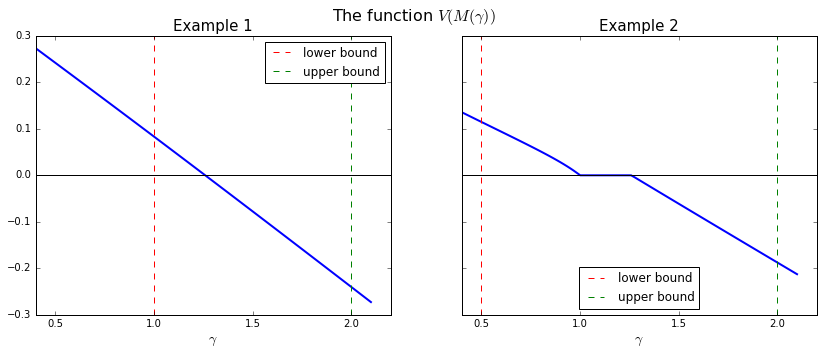

In [7]:
numb_grid = 100
gamma_grid = np.linspace(0.4, 2.1, numb_grid)

value_ex1_grid = np.asarray([N1.zerosum(gamma = gamma_grid[i])[0] for i in range(numb_grid)])
value_ex2_grid = np.asarray([N2.zerosum(gamma = gamma_grid[i])[0] for i in range(numb_grid)])

fig, ax = plt.subplots(1, 2, figsize = (14, 5), sharey = True)
fig.suptitle(r'The function $V(M(\gamma))$', fontsize = 16)

ax[0].plot(gamma_grid, value_ex1_grid, lw = 2)
ax[0].set_title(r'Example 1', fontsize = 15)
ax[0].axhline(0, color = 'k', lw =1)
ax[0].set_xlabel(r'$\gamma$', fontsize = 14)
ax[0].axvline(N1.bounds()[0], color = 'r', lw = 1, linestyle = '--', label = 'lower bound')
ax[0].axvline(N1.bounds()[1], color = 'g', lw = 1, linestyle = '--', label = 'upper bound')
ax[0].legend(loc = 'best')

ax[1].plot(gamma_grid, value_ex2_grid, lw = 2)
ax[1].set_title(r'Example 2', fontsize = 15)
ax[1].axhline(0, color = 'k', lw =1)
ax[1].set_xlabel(r'$\gamma$', fontsize = 14)
ax[1].axvline(N2.bounds()[0], color = 'r', lw = 1, linestyle = '--', label = 'lower bound')
ax[1].axvline(N2.bounds()[1], color = 'g', lw = 1, linestyle = '--', label = 'upper bound')
ax[1].legend(loc = 'best')

The `expansion` method implements the bisection algorithm for $\alpha_0$ (and uses the primal LP problem for $x_0$)

In [8]:
alpha0, x, p = N1.expansion()
print('alpha_0 = {}'.format(alpha0)) 
print('x_0 = {}'.format(x))
print('The corresponding p from the dual = {}'.format(p))

alpha_0 = 1.2599210478365421
x_0 = [ 0.33  0.26  0.41]
The corresponding p from the dual = [ 0.41  0.33  0.26  0.  ]


The `interest` method implements the bisection algorithm  for $\beta_0$ (and uses the dual LP problem for $p_0$)

In [9]:
beta0, x, p = N1.interest()
print('beta_0 = {}'.format(beta0)) 
print('p_0 = {}'.format(p))
print('The corresponding x from the primal = {}'.format(x))

beta_0 = 1.2599210478365421
p_0 = [ 0.41  0.33  0.26  0.  ]
The corresponding x from the primal = [ 0.33  0.26  0.41]


Of course, when $\gamma^*$ is unique, it is irrelevant which one of the two methods we use. In particular, as will be shown below, in case of an irreducible $(A,B)$ (like in Example 1), the maximal and minimal roots of $V(M(\gamma))$ necessarily coincide implying a ''full duality'' result, i.e. $\alpha_0 = \beta_0 = \gamma^*$, and that the expansion (and interest) rate $\gamma^*$ is unique. 

## Uniqueness and irreducibility

As an illustration, compute first the maximal and minimal roots of $V(M(\cdot))$ for Example 2, which displays a reducible input-output pair $(A, B)$. 

In [10]:
alpha0, x, p = N2.expansion()
print('alpha_0 = {}'.format(alpha0)) 
print('x_0 = {}'.format(x))
print('The corresponding p from the dual = {}'.format(p))

alpha_0 = 1.2528658034279943
x_0 = [ 0.    0.    0.33  0.26  0.41]
The corresponding p from the dual = [ 0.56  0.44  0.    0.    0.    0.  ]


In [11]:
beta0, x, p = N2.interest()
print('beta_0 = {}'.format(beta0)) 
print('p_0 = {}'.format(p))
print('The corresponding x from the primal = {}'.format(x))

beta_0 = 1.0000000009313226
p_0 = [ 0.5  0.5  0.   0.   0.   0. ]
The corresponding x from the primal = [ 0.33  0.33  0.33  0.    0.  ]


As we can see, with a reducible $(A,B)$, the roots found by the bisection alhorithms might differ, so there might be multiple $\gamma^*$ that make the value of the game with $M(\gamma^*)$ zero. (see the figure above)

Indeed, although the von Neumann theorem assures existence of the equilibrium, Assumptions I and II are not sufficient for uniqueness. Nonetheless, Kemeny et al. (1967) show that there are at most finitely many economic solutions, meaning that there are  only finitely many $\gamma^*$ that satisfy $V(M(\gamma^*)) = 0$ and $x_0^TBp_0 > 0$ and that for each such $\gamma^*_i$, there is a self-sufficient part of the economy (a sub-economy) that in equilibrium can expand independently  with the expansion coefficient $\gamma^*_i$. 

The following theorem (see Theorem 9.10. in Gale, 1960) asserts that imposing irreducibility is sufficient for uniqueness of $(\gamma^*, x_0, p_0)$.

**Theorem II:** Consider the conditions of Theorem 1. If the economy $(A,B)$ is irreducible, then $\gamma^*=\alpha_0=\beta_0$.


## A special case 

There is a special $(A,B)$ that allows us to simplify the solution method significantly by invoking the powerful Perron-Frobenius theorem for nonnegative matrices.

**Definition:** We call an economy _simple_ if it satisfies 
 1. $n=m$
 2. Each activity produces exactly one good
 3. Each good is produced by one and only one activity

These assumptions imply that $B=I_n$, i.e., that $B$ can be written as an identity matrix (possibly after reshuffling its rows and columns).

The simple model has the following special property (Theorem 9.11. in Gale): if $x_0$ and $\alpha_0>0$ solve the TEP with $(A,I_n)$, then

$$x_0^T = \alpha_0 x_0^T A\hspace{1cm}\Leftrightarrow\hspace{1cm}x_0^T A=\left(\frac{1}{\alpha_0}\right)x_0^T$$

The latter shows that $1/\alpha_0$ is a positive eigenvalue of $A$ and $x_0$ is the correponding nonnegative left eigenvector. The classical result of **Perron and Frobenius** implies that a nonnegative matrix always has a nonnegative eigenvalue-eigenvector pair. Moreover, if $A$ is irreducible, then the optimal intensity vector $x_0$ is positive and _unique_ up to multiplication by a positive scalar.

Suppose that $A$ is reducible with $k$ irreducible subsets $S_1,\dots,S_k$. Let $A_i$ be the submatrix corresponding to $S_i$ and let $\alpha_i$ and $\beta_i$ be the associated expansion and interest factors, respectively. Then we have 

$$\alpha_0 = \max_i \{\alpha_i\}\hspace{1cm}\text{and}\hspace{1cm}\beta_0 = \min_i \{\beta_i\}$$




#### References

Gale, David, **The Theory of Linear Economic Models**, New York: McGraw-Hill Book Company, 1960.

Hamburger, Michael J.,  Gerald L. Thompson and Roman L. Weil, Jr., 1967, "Computation of Expansion Rates for the Generalized von Neumann Model of an Expanding Economy", Econometrica Vol. 35, No. 3/4,  pp. 542-547

Kemeny, John G.; Morgenstern, Oskar; Thompson, Gerald L., 1956, "A generalization of the von Neumann model of an expanding economy". Econometrica. 24. pp. 115–135.

Nash, John. 1951. "Non-Cooperative Games." Annals of Mathematics, Second Series, 54, no. 2, pp 286-95.

von Neumann, John, 1928, "Zur theories der gesellschaftsspiele". Mathematische Annalen 100, pp 295–320. English translation by S. Bergmann in Contributions to the Theory of Games IV, ed. R.D. Luce and A.W. Tucker. Princeton: Princeton University Press, 1959

von Neumann, John, 1937, "Über ein ökonomisches Gleichuns-system und eine Verallgeneinerung des Brouwerschen Fixpunksatzes," Ergebnisse eines mathematischen Kolloquium, 8, , pp. 73-83, translated as "A Model of General Economic Equilibrium," Review of Economic Studies, 13. 1945, pp. 1-9.


